# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how = "outer", on="Mouse ID")
combined_data = combined_data.sort_values(by =["Timepoint"])
combined_data = combined_data.reset_index(drop=True)

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [2]:
# Checking the number of mice.
Mice_number = len(combined_data["Mouse ID"].value_counts())
Mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"], keep=False)]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,g989,0,45.000000,0,Propriva,Female,21,26
232,g989,0,45.000000,0,Propriva,Female,21,26
277,g989,5,47.570392,0,Propriva,Female,21,26
335,g989,5,48.786801,0,Propriva,Female,21,26
599,g989,10,49.880528,0,Propriva,Female,21,26
600,g989,10,51.745156,0,Propriva,Female,21,26
736,g989,15,51.325852,1,Propriva,Female,21,26
742,g989,15,53.442020,0,Propriva,Female,21,26
1080,g989,20,54.657650,1,Propriva,Female,21,26
1102,g989,20,55.326122,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mice_number_clean = combined_data[combined_data["Mouse ID"]!= 'g989']
Mice_number_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,w584,0,45.000000,0,Infubinol,Male,3,29
2,p136,0,45.000000,0,Zoniferol,Female,5,28
3,a411,0,45.000000,0,Ramicane,Male,3,22
4,b447,0,45.000000,0,Ceftamin,Male,2,30
...,...,...,...,...,...,...,...,...
1888,k403,45,22.050126,1,Ramicane,Male,21,16
1889,z581,45,62.754451,3,Infubinol,Female,24,25
1890,v923,45,40.658124,2,Capomulin,Female,19,21
1891,j119,45,38.125164,1,Capomulin,Female,7,23


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_number =len(Mice_number_clean['Mouse ID'].value_counts())
clean_number

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
clean_by_drug = Mice_number_clean.groupby(['Drug Regimen'])
tumor_mean = clean_by_drug['Tumor Volume (mm3)'].mean()
tumor_median = clean_by_drug['Tumor Volume (mm3)'].median()
tumor_variance = clean_by_drug['Tumor Volume (mm3)'].var()
tumor_sd = clean_by_drug['Tumor Volume (mm3)'].std()
tumor_SEM = clean_by_drug['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({"Tumor Mean Volume": tumor_mean,
                             "Tumor Median Volume" : tumor_median,
                             "Tumor Volume Variance":tumor_variance,
                             "Tumor Volume Std. Dev.":tumor_sd,
                             "Tumor Volume Std. Err.":tumor_SEM})
summary_stats

,Tumor Mean Volume,Tumor Median Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
sum_table = Mice_number_clean.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
sum_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

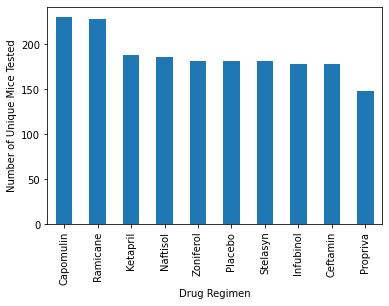

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Mice_number_clean['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

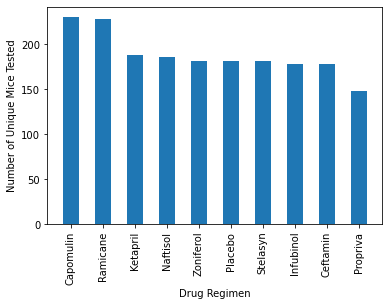

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
regimen = Mice_number_clean["Drug Regimen"].value_counts()
x_axis = np.arange(len(regimen))
plt.bar(x_axis, regimen, width = 0.5)

#Set ticks
ticks = [r for r in x_axis]
plt.xticks(ticks, regimen.index.values, rotation = 90)

#Set labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

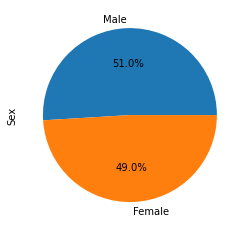

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution = Mice_number_clean['Sex'].value_counts()
pie_plot = sex_distribution.plot.pie(autopct="%1.1f%%", startangle=0, ylabel='Sex')

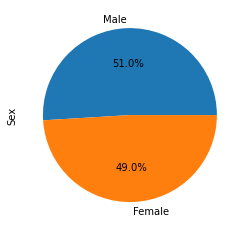

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution, labels=sex_distribution.index.values, autopct="%1.1f%%", startangle=0)
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_grouped = Mice_number_clean.groupby("Mouse ID")
max_time = mouse_grouped["Timepoint"].max().sort_values(ascending=False)
max_timepoint = pd.DataFrame(max_time)

#max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = max_timepoint.merge(Mice_number_clean, on = ("Mouse ID","Timepoint"), how = "left")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,z969,45,73.867845,4,Naftisol,Male,9,30
1,i177,45,33.562402,3,Ramicane,Male,10,18
2,l509,45,41.483008,3,Capomulin,Male,17,21
3,l471,45,67.748662,1,Ceftamin,Female,7,28
4,k894,45,60.752704,4,Zoniferol,Female,13,29


In [13]:
Mice_number_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,w584,0,45.0,0,Infubinol,Male,3,29
2,p136,0,45.0,0,Zoniferol,Female,5,28
3,a411,0,45.0,0,Ramicane,Male,3,22
4,b447,0,45.0,0,Ceftamin,Male,2,30


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = merged_df[merged_df['Drug Regimen'] == drug]
    tumor_volume = drug_df["Tumor Volume (mm3)"]
    tumor_vol_list.append(tumor_volume)
    # add subset
    # Set quartiles
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    #lower and upper bound
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_low_df = drug_df[drug_df['Tumor Volume (mm3)'] <= lower_bound]
    outlier_high_df = drug_df[drug_df['Tumor Volume (mm3)'] >= upper_bound]
    
    outliers_total_df = pd.merge(outlier_low_df, outlier_high_df)
    outlier_amount = len(outlier_low_df['Tumor Volume (mm3)']) + len(outlier_high_df['Tumor Volume (mm3)'])

    
    # Determine outliers using upper and lower bounds
    print(f"{drug}'s potential outliers: {outlier_amount}, Name: {tumor_volume}, dtype: {type(outlier_amount)}")

Capomulin's potential outliers: 0, Name: 2      41.483008
16     38.125164
18     37.311846
20     47.685963
35     33.329098
38     28.430964
42     38.846876
49     38.939633
51     38.982878
72     40.159220
74     37.074024
93     28.484033
94     34.455298
96     36.041047
97     40.658124
100    40.728578
101    41.581521
105    23.343598
119    31.023923
120    31.896238
124    32.377357
147    38.753265
184    30.485985
193    46.539206
207    39.952347
Name: Tumor Volume (mm3), dtype: float64, dtype: <class 'int'>
Ramicane's potential outliers: 0, Name: 1      33.562402
7      22.050126
10     36.134852
12     31.560470
24     31.095335
40     30.564625
43     36.374510
45     45.220869
46     29.128472
57     32.978522
58     38.810366
60     43.047543
61     38.407618
77     40.659006
82     37.311236
85     33.397653
90     40.667713
109    30.276232
110    37.225650
116    30.638696
149    36.561652
157    43.419381
162    38.342008
194    44.183451
231    43.166373
Name: 

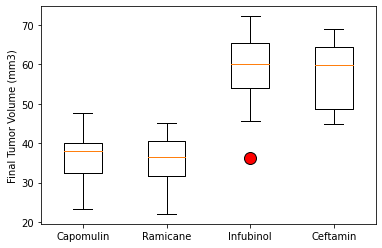

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
marker_value = dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_vol_list, flierprops=marker_value)

# Add ticks and labels to boxplot
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

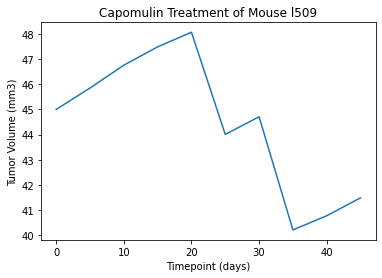

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Identify Mouse l509
mouse = Mice_number_clean.loc[Mice_number_clean['Mouse ID'] == 'l509']

# plot line plot of tumor volume vs time
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

# add title and axis labels
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")

# Display plot
plt.show()

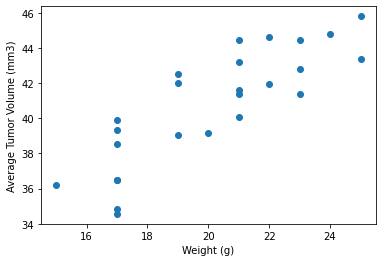

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Filter data where Drug Regimen == Capomulin
Capomulin_df = Mice_number_clean[Mice_number_clean["Drug Regimen"]=="Capomulin"]
# Group mouse by id
Capomulin_g = Capomulin_df.groupby("Mouse ID")
# Calculate mean (axis)
Capomulin_g_w = Capomulin_g["Weight (g)"].mean()
tumor_mean = Capomulin_g['Tumor Volume (mm3)'].mean()
#Plot
plt.scatter(Capomulin_g_w, tumor_mean)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

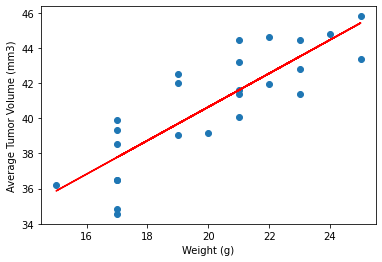

The correlation between weight and the average tumor volume is 0.84


In [19]:
x_values = Capomulin_g_w
y_values = tumor_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The correlation between weight and the average tumor volume is {round(rvalue,2)}")